# Set the runtime to GPU : Runtime ---> Change runtime type ---> GPU

In [19]:
import numpy as np
import tensorflow
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

Load dataset:

MNIST handwritten digit dataset is a collection of digits which can be used for classification purposes.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # load the data from keras dataset

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
x_train shape (60000, 28, 28)
x_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

<BarContainer object of 10 artists>

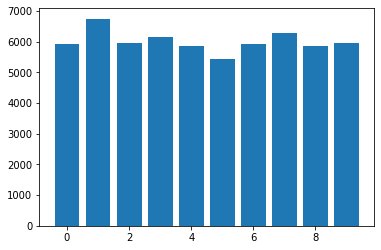

In [9]:
plt.bar(np.unique(y_train, return_counts=True)[0],np.unique(y_train, return_counts=True)[1])

Visualize images

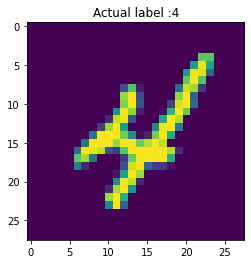

In [12]:
i=9 # index of image you want to see
plt.title('Actual label :'+ str(y_train[i]))
plt.imshow(x_train[i])

Re-arranging the shapes of images for feeding into the Artificial neural networks

In [16]:
x_train = x_train.reshape((x_train.shape[0],-1))
print(x_train.shape)
x_test = x_test.reshape((x_test.shape[0],-1))
print(x_test.shape)

(60000, 784)
(10000, 784)


Model building

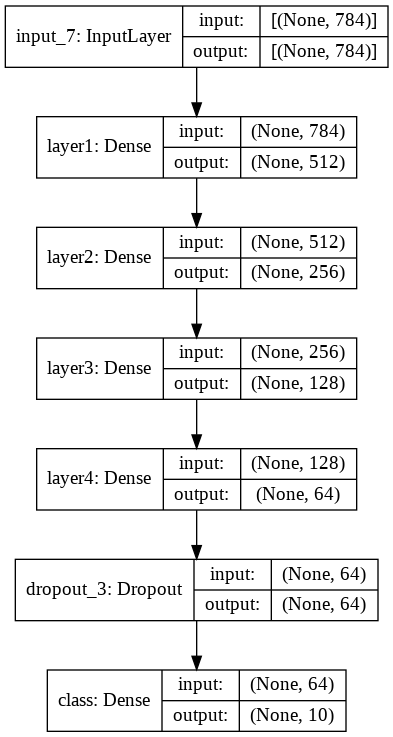

In [24]:
input = Input(shape=(784)) # the shape of every input is 28x28 = 784

layer1 = Dense(512, activation='relu', name='layer1')(input) # This is a layer having 512 neurons taking input as its feed.
layer2 = Dense(256, activation='relu', name='layer2')(layer1)
layer3 = Dense(128, activation='relu', name='layer3')(layer2)
layer4 = Dense(64, activation='relu', name='layer4')(layer3)
layer5 = Dropout(0.2)(layer4)
output = Dense(10,activation='softmax', name ='class')(layer5) # activation is softmax for classifiying into 10 classes 

classifier = keras.Model(input,output)
tf.keras.utils.plot_model(classifier,show_shapes=True, show_layer_names=True)

In [26]:
# compile the model

classifier.compile(optimizer = optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# sparse_categorical_crossentropy is the loss function for sparsly coded labels. 
# eg: shape of y_train = (?,)/(?,1) i.e. single label and not an array

Train the model

In [28]:
classifier.fit(x_train,y_train,batch_size=64,epochs = 10)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2465 - accuracy: 0.9317
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1890 - accuracy: 0.9500
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1458 - accuracy: 0.9608
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1354 - accuracy: 0.9644
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1135 - accuracy: 0.9683
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1076 - accuracy: 0.9715
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0944 - accuracy: 0.9752
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0859 - accuracy: 0.9773
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0841 - accuracy: 0.9784
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0739 - accuracy: 0.9812

In [31]:
predictions = classifier.predict(x_test)
print('predictions shape: ', predictions.shape)

# Get the actual labels

y_preds = np.argmax(predictions, axis = -1)
print('Changed shape: ', y_preds.shape)

predictions shape:  (10000, 10)
Changed shape:  (10000,)


In [34]:
# Computing the accuracy

accuracy = np.sum(y_preds == y_test)/len(y_preds)*100

print('The testing accuracy is ',accuracy,' %')

The testing accuracy is  97.18  %


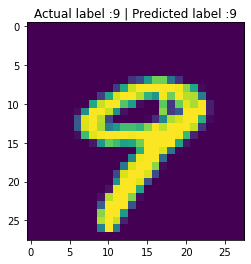

In [40]:
i=9 # index of image you want to see
plt.title('Actual label :' + str(y_test[i]) + ' | Predicted label :' + str(y_preds[i]))
plt.imshow(x_test[i].reshape((28,28)))

In [54]:
import numpy as np
from scipy import linalg as LA

x = x_train
x1 = np.mean(x,axis = 0)
#centering the data
x = x - x1

cov = np.cov(x, rowvar = False)
evals , evecs = LA.eigh(cov)


idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

a = np.dot(x, evecs) 

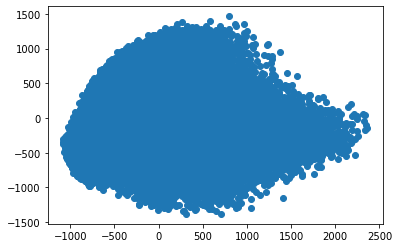

In [56]:
a1 = a[:,0]
a2 = a[:,1]
plt.scatter(a1,a2,label) 

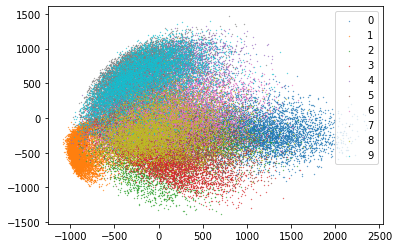

In [61]:
import matplotlib.pyplot as plt
import numpy as  np

fig, ax = plt.subplots()
scatter_x = a[:,0]
scatter_y = a[:,1]
group = y_train
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g, s = 0.1)
ax.legend()
plt.show()